In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

# Q 1 and 2

In [2]:
# Inputs
n= 300
x = np.random.uniform(low =0, high = 1,  size = n)
# Vector Fields
v = np.random.uniform(low = -0.1, high = 0.1, size = n)
#v

# Q 3

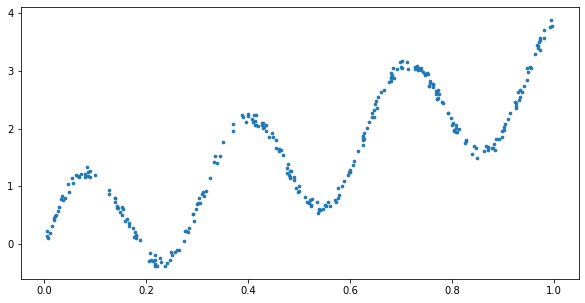

In [3]:
d = []
for i in range(0,n):
    d.append(sin(20*x[i]) + 3*x[i] + v[i])
d = np.asarray(d)
# d
fig, ax = plt.subplots(figsize = (10,5))
plt.scatter(x,d, s  = 7)
plt.show()

In [4]:

N = 24
w = np.random.uniform(low = -1, high  = 1, size = 3*N + 1)
#w

In [5]:
# Derivative of tanh(v)

def der(x):
    return 1-(tanh(x)**2)



In [6]:
def mse(x, d, w, n,N):
    c = 0
    u = []
    for i in range(0,n):
        p = []
        j = 0
        while j < 3*N and len(p)<24:
            u.append((w[j+1]*x[i])+w[j])
            p.append(tanh((w[j+1]*x[i])+w[j]))
            j += 2
        sum  = 0
        #print(p)
        for k in range(len(p)):
            sum += w[j+k] * p[k]
        y = sum + w[3*N]
        c += (d[i] - y)**2
            
    return c

In [7]:
cos = mse(x, d, w, n,N)
cos

825.9348476844599

# Q 4

In [8]:
# Forward Propagation

def forw_prop(w, x, n, N):
    u = []
    p = []
    j = 0
    while j < 3*N and len(p)<24:
        u.append((w[j+1]*x)+w[j])
        p.append(tanh((w[j+1]*x)+w[j]))
        j += 2
    sum  = 0
    #print(p)
    for k in range(len(p)):
        sum += w[j+k] * p[k]
    y = sum + w[3*N]
    
    return y,u

In [9]:
# y,u = forw_prop(w0,x[1],n, N)
# print(y)
# print(d[0])
# print(u)

In [10]:
#Back Propagation
def back_prop(d,x,w, n, N):
    g =[]
    y, u = forw_prop(w, x, n, N)
    diff = d - y
    i = 0
    j = 0
    while i < 3*N+1:
        if i % 2 == 0 and i < 48:
            m = -(der(u[j])*w[48+j])*diff
            #print(m)
            g.append(m)
        elif i % 2 != 0 and i < 48:
            g.append(-(der(u[j])*w[48+j])*diff)
            j += 1
        elif i >= 48 and i < 3*N + 1:
            g.append(-diff)
        else:
            g.append(-diff)
        i += 1
    
    g = np.asarray(g)
    return (2*g)/n

In [11]:
# g = back_prop(d[2],x[2], w, n, N)
# w = w - 0.45*g
# y,u = forw_prop(w,x[2],n, N)
# print(y)
# print(d[0])
# print(u)

In [14]:
def alg(x, d, w, lr, n, N, iter):
    t = w
    obj =[]
    epoch = []
    e = 0
    epoch.append(e)
    obj.append(mse(x, d, w, n,N))
    cos = 100000000
    while e < iter:
        prev = cos
        i = 0
        while i < len(x):
            g = back_prop(d[i], x[i], w, n, N)
            w =  w - lr*g
            i += 1
        cos = mse(x, d, w, n,N)
        if cos > prev:
            lr = 0.9*lr
            obj =[]
            epoch = []
            e = 0
            epoch.append(e)
            obj.append(mse(x, d, t, n,N))
            cos = 100000000
            
        elif cos <= prev:
            e += 1
            epoch.append(e)
            obj.append(mse(x, d, w, n,N))
            #print(g)
    return w, obj, epoch

In [15]:
w0, cf, epoch= alg(x,d,w,0.001, n,N, 10000)

# Plot: the number of epochs vs the MSE in the backpropagation algorithm.

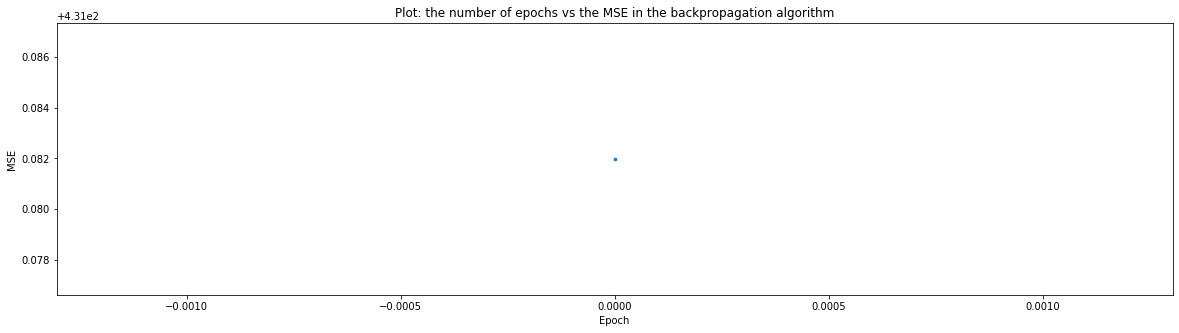

In [30]:
fig, ax = plt.subplots(figsize = (20,5))
plt.scatter(epoch,cf, s  = 7)
plt.plot(epoch,cf)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title('Plot: the number of epochs vs the MSE in the backpropagation algorithm')
plt.show()

In [15]:


def forw_prop1(w, x, n, N):
    y =[]
    u = []
    for i in range(0,n):
        p = []
        j = 0
        while j < 3*N and len(p)<24:
            u.append((w[j+1]*x[i])+w[j])
            p.append(tanh((w[j+1]*x[i])+w[j]))
            j += 2
        sum  = 0
        #print(p)
        for i in range(len(p)):
            sum += w[j+i] * p[i]
        y.append(sum + w[3*N])

    y = np.asarray(y)
    return y

# Q 5

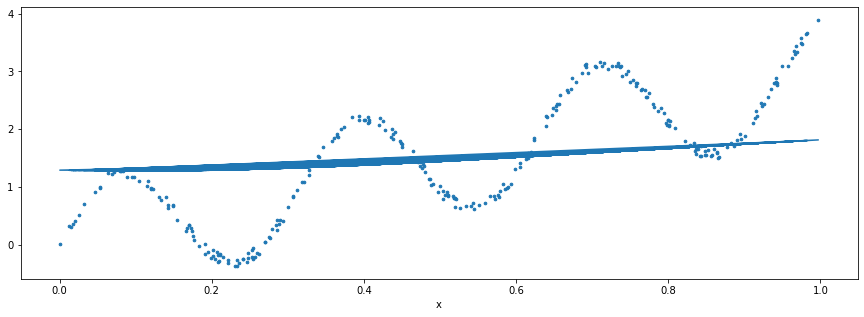

In [16]:
# Fit 

y = forw_prop1(w0,x,n,N)
#print(y)
fig, ax = plt.subplots(figsize = (15,5))
plt.scatter(x,d, s  = 7)
plt.plot(x,y)
plt.xlabel("x")
plt.show()

In [40]:
# def error(x, d, w, n,N):
#     count = 0
#     u = []
#     for i in range(0,n):
#         p = []
#         j = 0
#         while j < 3*N and len(p)<24:
#             u.append((w[j+1]*x[i])+w[j])
#             p.append(tanh((w[j+1]*x[i])+w[j]))
#             j += 2
#         sum  = 0
#         #print(p)
#         for k in range(len(p)):
#             sum += w[j+k] * p[k]
#         if d[i] != (sum + w[3*N]):
#             count += 1
            
#     return count

In [41]:
# lr = 0.5
# e = 290
# epoch = 0
# errors = []
# errors.append(error(x, d, w, n, N))
# cos = 100000000
# while errors[epoch] > e:
#     prev = cos
#     for i in range(len(x)):
#         w =  w - lr*back_prop(d[i], x[i], w, n, N)
#     errors.append(error(x, d, w, n, N))
#     epoch += 1
#     cos = cost(x, d, w, n,N)
#     if cos > prev:
#         lr = 0.9*lr
#         #print(w)

In [42]:
#w

In [43]:
# # Forward Propagation

# def forw_prop(w, x, n, N):
#     y =[]
#     u = []
#     for i in range(0,n):
#         p = []
#         j = 0
#         while j < 3*N and len(p)<24:
#             u.append((w[j+1]*x[i])+w[j])
#             p.append(tanh((w[j+1]*x[i])+w[j]))
#             j += 2
#         sum  = 0
#         #print(p)
#         for i in range(len(p)):
#             sum += w[j+i] * p[i]
#         y.append(sum + w[3*N])

#     y = np.asarray(y)
#     return y,u

In [21]:
# #Back Propagation
# def back_prop(d,x,w, n, N):
#     g =[]
#     y, u = forw_prop(w, x, n, N)
#     diff = d - y
#     i = 0
#     j = 0
#     while i < 3*N+2:
#         if i % 2 == 0 and i < 48:
#             g.append(-(der(u[j])*w[48+j])*diff[j])
#             i += 1
#         elif i % 2 != 0 and i < 48:
#             g.append(-(der(u[j])*w[48+j])*diff[j])
#             i += 1
#             j += 1
#         elif i >= 48 and i < 3*N + 1:
#             g.append(-diff[j])
#             i += 1
#         else:
#             g.append(-diff[j])
#             i += 1
#     return g